# Precursor Analysis


In [1]:
#Fundamental data contains the ticker, a given period, and many fundamenatal financial metrics for that period
fundamentalData <- read.csv('nyse/fundamentals.csv')

In [2]:
#Figure out what are the basket of companies we are looking at and their various sectors
uniqueTickers <- unique(fundamentalData$Ticker.Symbol)
securitiesData <- read.csv('nyse/securities.csv')

In [3]:
#Sector Representation in Data
prop.table(table(securitiesData$GICS.Sector))


     Consumer Discretionary            Consumer Staples 
                 0.16831683                  0.07326733 
                     Energy                  Financials 
                 0.07128713                  0.12673267 
                Health Care                 Industrials 
                 0.11683168                  0.13663366 
     Information Technology                   Materials 
                 0.13465347                  0.04950495 
                Real Estate Telecommunications Services 
                 0.05742574                  0.00990099 
                  Utilities 
                 0.05544554 

# Analyzing Cash Ratios in various sectors

In [60]:
sector <- function(ticker){
    return(securitiesData[which(securitiesData$Ticker.symbol == ticker), ][4][1,])
}
#Cash Ratios for IT Companies
#Duplicate companies across many periods ARE included
sectors <- lapply(X = as.vector(fundamentalData$Ticker.Symbol), FUN = sector)
fundamentalData['sector'] = as.vector(unlist(sectors))

In [37]:
install.packages('ggplot2')
install.packages('reshape2')


The downloaded binary packages are in
	/var/folders/7d/8fqmvyg97bq8k_c4rssxnrzh0000gn/T//RtmpPBC6yR/downloaded_packages

The downloaded binary packages are in
	/var/folders/7d/8fqmvyg97bq8k_c4rssxnrzh0000gn/T//RtmpPBC6yR/downloaded_packages


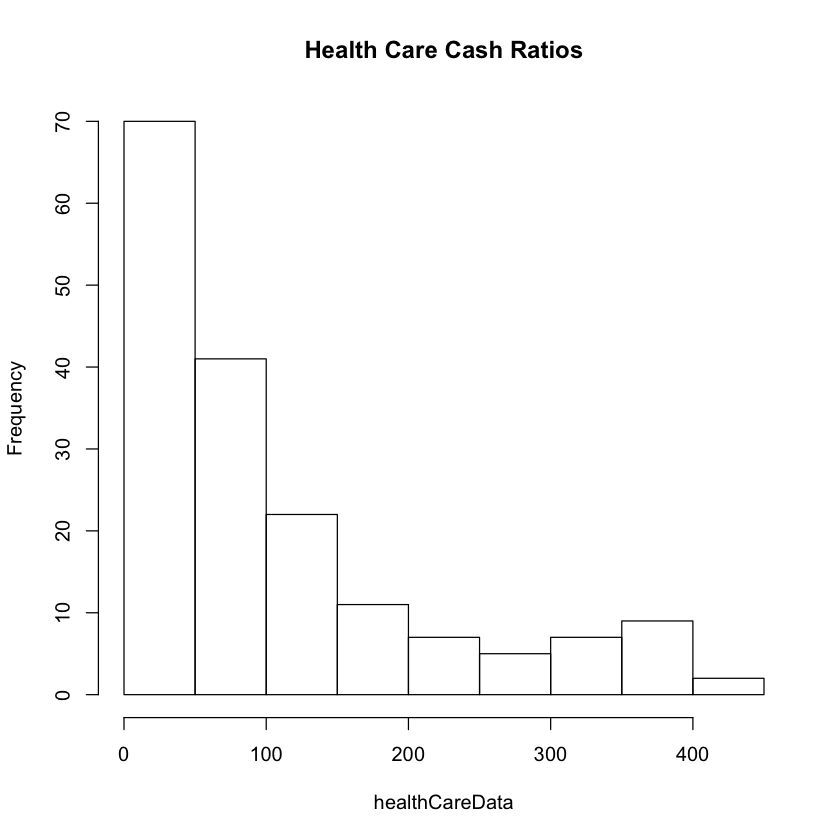

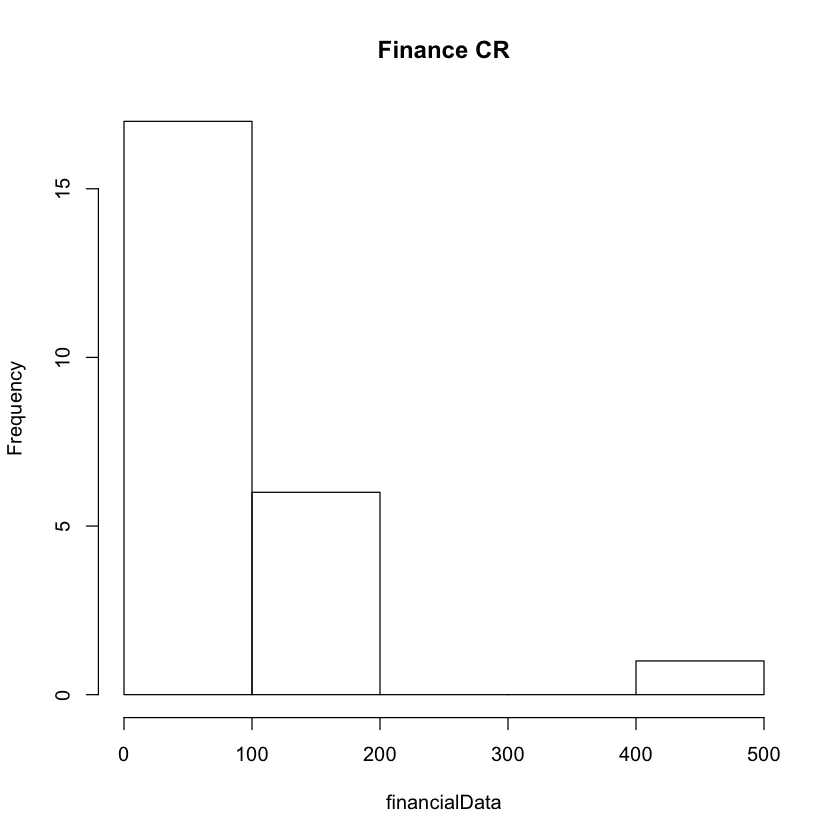

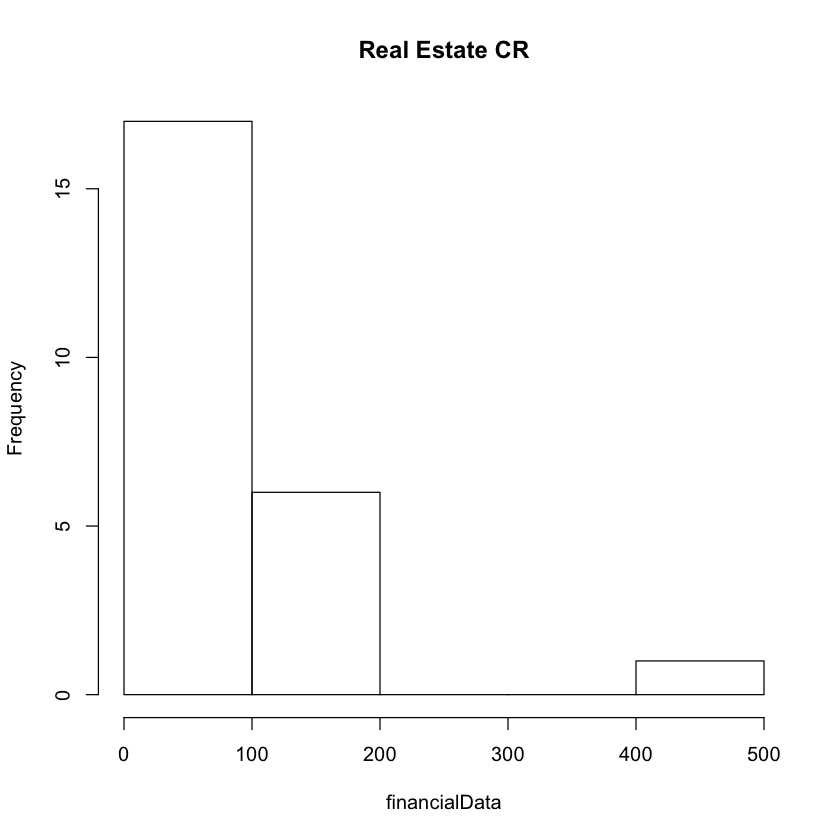

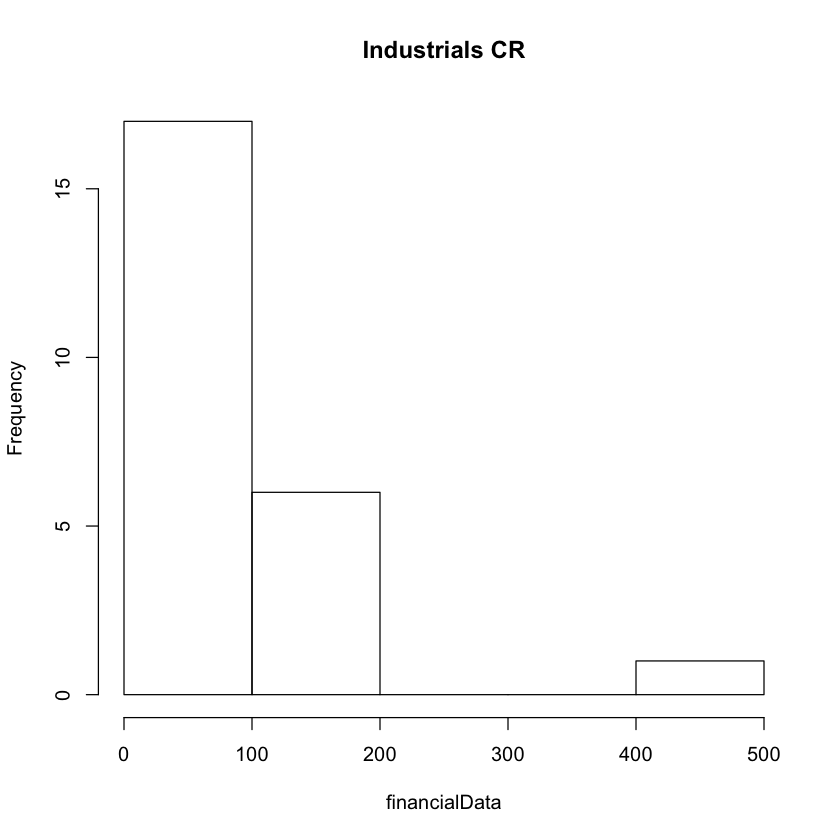

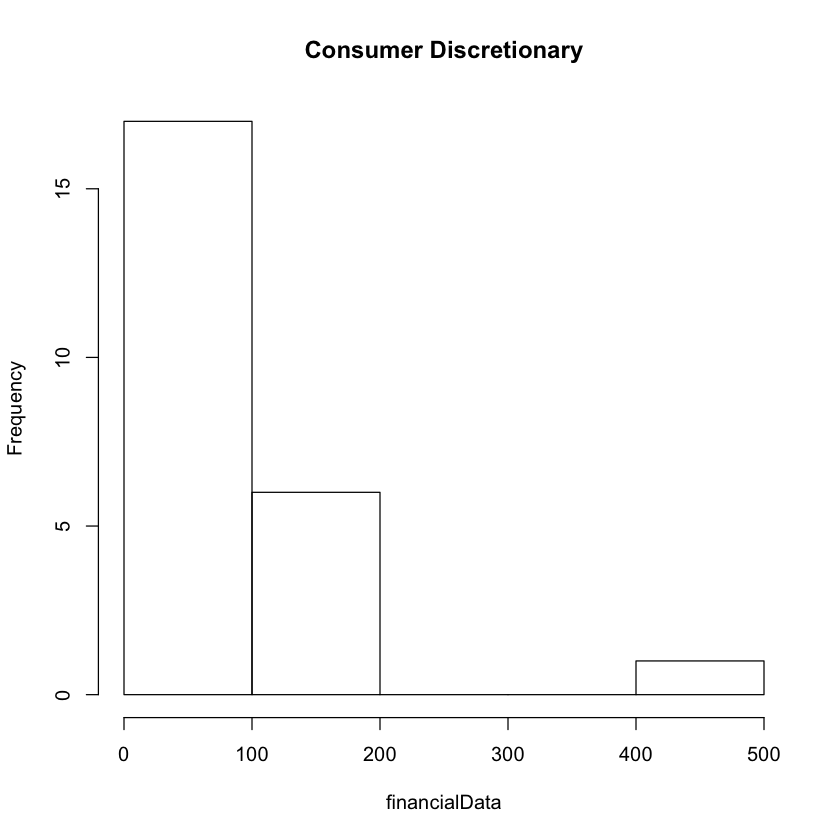

In [79]:
healthCareData <- na.omit(fundamentalData[which(fundamentalData['sector'] == 'Health Care'),]$Cash.Ratio)
hist(healthCareData, main = "Health Care Cash Ratios")


financialData <- na.omit(fundamentalData[which(fundamentalData['sector'] == 'Financials'),]$Cash.Ratio)
hist(financialData, main = "Finance CR")




realEstate <- na.omit(fundamentalData[which(fundamentalData['sector'] == 'Real Estate'),]$Cash.Ratio)
hist(financialData, main = "Real Estate CR")

Industrials <- na.omit(fundamentalData[which(fundamentalData['sector'] == 'Industrials'),]$Cash.Ratio)
hist(financialData, main = "Industrials CR")


consumerDiscretionary <- na.omit(fundamentalData[which(fundamentalData['sector'] == 'Consumer Discretionary'),]$Cash.Ratio)
hist(financialData, main = "Consumer Discretionary")




In [ ]:
itCashRatios <- fundamentalData[which(fundamentalData['sector'] == "Information Technology"),]$Cash.Ratio
hist(itCashRatios, main = 'Distribution of Cash Ratios in IT')

In [80]:
#Ok so it looks like the distribution of the cash ratios are pretty similar across these sectors.